In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
from cycling_manager.preprocess import get_data

df = get_data()

full df shape (603619, 25)


In [10]:
df_small = df[df['year']> 2017]

In [2]:
merged = pd.read_csv('../raw_data/merged_clean.csv')

In [3]:
merged.columns

Index(['Unnamed: 0', 'name', 'year', 'type', 'date', 'result', 'gc', 'icon',
       'race_ref', 'race_name', 'race_detail', 'race_rank', 'distance',
       'points', 'Avg. speed winner:', 'Distance:', 'Parcours type:',
       'ProfileScore:', 'Vert. meters:', 'Startlist quality score:',
       'Won how: ', 'adjusted_points'],
      dtype='object')

In [11]:
all_races = ["_".join(x.split('/')[1:])+'.jpg' for x in df_small.race_ref.unique()]

In [40]:
all_races

['tour-de-france_2020_stage-17.jpg',
 'tour-de-france_2020_stage-16.jpg',
 'tour-de-france_2020_stage-15.jpg',
 'tour-de-france_2020_stage-14.jpg',
 'tour-de-france_2020_stage-13.jpg',
 'tour-de-france_2020_stage-12.jpg',
 'tour-de-france_2020_stage-11.jpg',
 'tour-de-france_2020_stage-10.jpg',
 'tour-de-france_2020_stage-9.jpg',
 'tour-de-france_2020_stage-8.jpg',
 'tour-de-france_2020_stage-7.jpg',
 'tour-de-france_2020_stage-6.jpg',
 'tour-de-france_2020_stage-5.jpg',
 'tour-de-france_2020_stage-4.jpg',
 'tour-de-france_2020_stage-3.jpg',
 'tour-de-france_2020_stage-2.jpg',
 'tour-de-france_2020_stage-1.jpg',
 'dauphine_2020_stage-4.jpg',
 'dauphine_2020_stage-3.jpg',
 'dauphine_2020_stage-2.jpg',
 'dauphine_2020_stage-1.jpg',
 'tour-de-l-ain_2020_stage-3.jpg',
 'tour-de-l-ain_2020_stage-2.jpg',
 'tour-de-l-ain_2020_stage-1.jpg',
 'la-route-d-occitanie_2020_stage-4.jpg',
 'la-route-d-occitanie_2020_stage-3.jpg',
 'la-route-d-occitanie_2020_stage-2.jpg',
 'la-route-d-occitanie_2020_s

In [46]:
import os

current_imgs = os.listdir('../raw_data/img')

len(current_imgs)

4569

In [48]:
missing = list(set(all_races) - set(current_imgs))
missing = ["race/"+"/".join(x.replace('.jpg','').split('_')) for x in missing]
len(missing)

461

In [49]:
base_url = 'https://www.procyclingstats.com/'

for race in missing:
    
    url = base_url + race + '/today/profiles'
    
    print(url)
    
    response = requests.get(url).content
    
    soup = BeautifulSoup(response, 'html.parser')
    
    try:
    
        img_url = soup.find_all('img')[0]['src']
        print(img_url)
        img_url = [x['src'] for x in soup.find_all('img') if 'profile' in x['src'].split('/')[-1]][0]
        img_url = base_url + img_url
        
        response = requests.get(img_url).content
        image_name = "_".join(race.split('/')[1:])
        with open(f'../raw_data/img/{image_name}.jpg', 'wb') as handler:
            handler.write(response)
            
    except Exception as e:
        print(f'error for {race}')
        print(e)
        

https://www.procyclingstats.com/race/nc-ethiopia-itt/2019/result/today/profiles
error for race/nc-ethiopia-itt/2019/result
list index out of range
https://www.procyclingstats.com/race/nc-poland/2020/result/today/profiles
error for race/nc-poland/2020/result
list index out of range
https://www.procyclingstats.com/race/nc-portugal2/2018/result/today/profiles
error for race/nc-portugal2/2018/result
list index out of range
https://www.procyclingstats.com/race/nc-belgium/2018/result/today/profiles
error for race/nc-belgium/2018/result
list index out of range
https://www.procyclingstats.com/race/tour-du-maroc/2018/stage-5/today/profiles
error for race/tour-du-maroc/2018/stage-5
list index out of range
https://www.procyclingstats.com/race/circuit-des-ardennes-international/2019/stage-3/today/profiles
error for race/circuit-des-ardennes-international/2019/stage-3
list index out of range
https://www.procyclingstats.com/race/nc-norway/2021/result/today/profiles
error for race/nc-norway/2021/resu

In [21]:
response = requests.get('https://www.procyclingstats.com/race/arctic-race-of-norway/2021/stage-1/today/profiles').content
    
soup = BeautifulSoup(response, 'html.parser')

In [26]:
[x['src'] for x in soup.find_all('img') if 'profile' in x['src'].split('/')[-1]][0]

'images/profiles/ap/de/arctic-race-of-norway-2021-stage-1-profile-bf2fc708e0.jpg'

In [124]:
import os

imgs = os.listdir('../raw_data/img')
imgs = [img for img in imgs if int(img.split('_')[1])>2016]
imgs

['giro-d-italia_2017_stage-6.jpg',
 'tour-de-normadie_2017_stage-3.jpg',
 'tour-of-california_2019_stage-3.jpg',
 'volta-ao-algarve_2018_stage-5.jpg',
 'tour-de-wallonie_2020_stage-3.jpg',
 'e3-harelbeke_2019_result.jpg',
 'tour-de-l-ain_2020_stage-2.jpg',
 'tour-de-france_2018_stage-9.jpg',
 'tour-de-langkawi_2019_stage-6.jpg',
 'tour-de-france_2020_stage-16.jpg',
 'herald-sun-tour_2020_stage-3.jpg',
 'world-championships-u23_2019_result.jpg',
 'la-roue-tourangelle_2019_result.jpg',
 'tirreno-adriatico_2018_stage-7.jpg',
 'volta-a-portugal_2019_stage-2.jpg',
 'tour-de-pologne_2020_stage-1.jpg',
 'tour-de-france_2017_stage-13.jpg',
 'giro-d-italia_2020_stage-2.jpg',
 'trofeo-laigueglia_2019_result.jpg',
 'giro-d-italia_2019_stage-9.jpg',
 'benelux-tour_2019_stage-6.jpg',
 'tour-de-suisse_2017_stage-1.jpg',
 'dauphine_2017_stage-2.jpg',
 'vuelta-a-espana_2019_stage-11.jpg',
 'vuelta-a-la-comunidad-valenciana_2019_stage-4.jpg',
 'zlm-tour_2019_stage-1.jpg',
 'tour-of-belgium_2018_stage-4

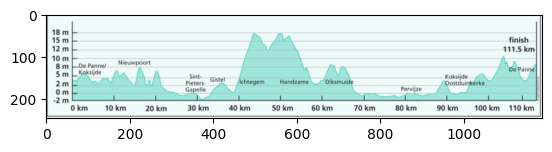

In [108]:
import cv2
import matplotlib.pyplot as plt

ls = []

for pic in imgs:
    try:
        file_name = '../raw_data/img/'+ pic
        im = cv2.imread(file_name)
        plt.imshow(im);
    except AttributeError as e:
        print(e)
        print(pic)

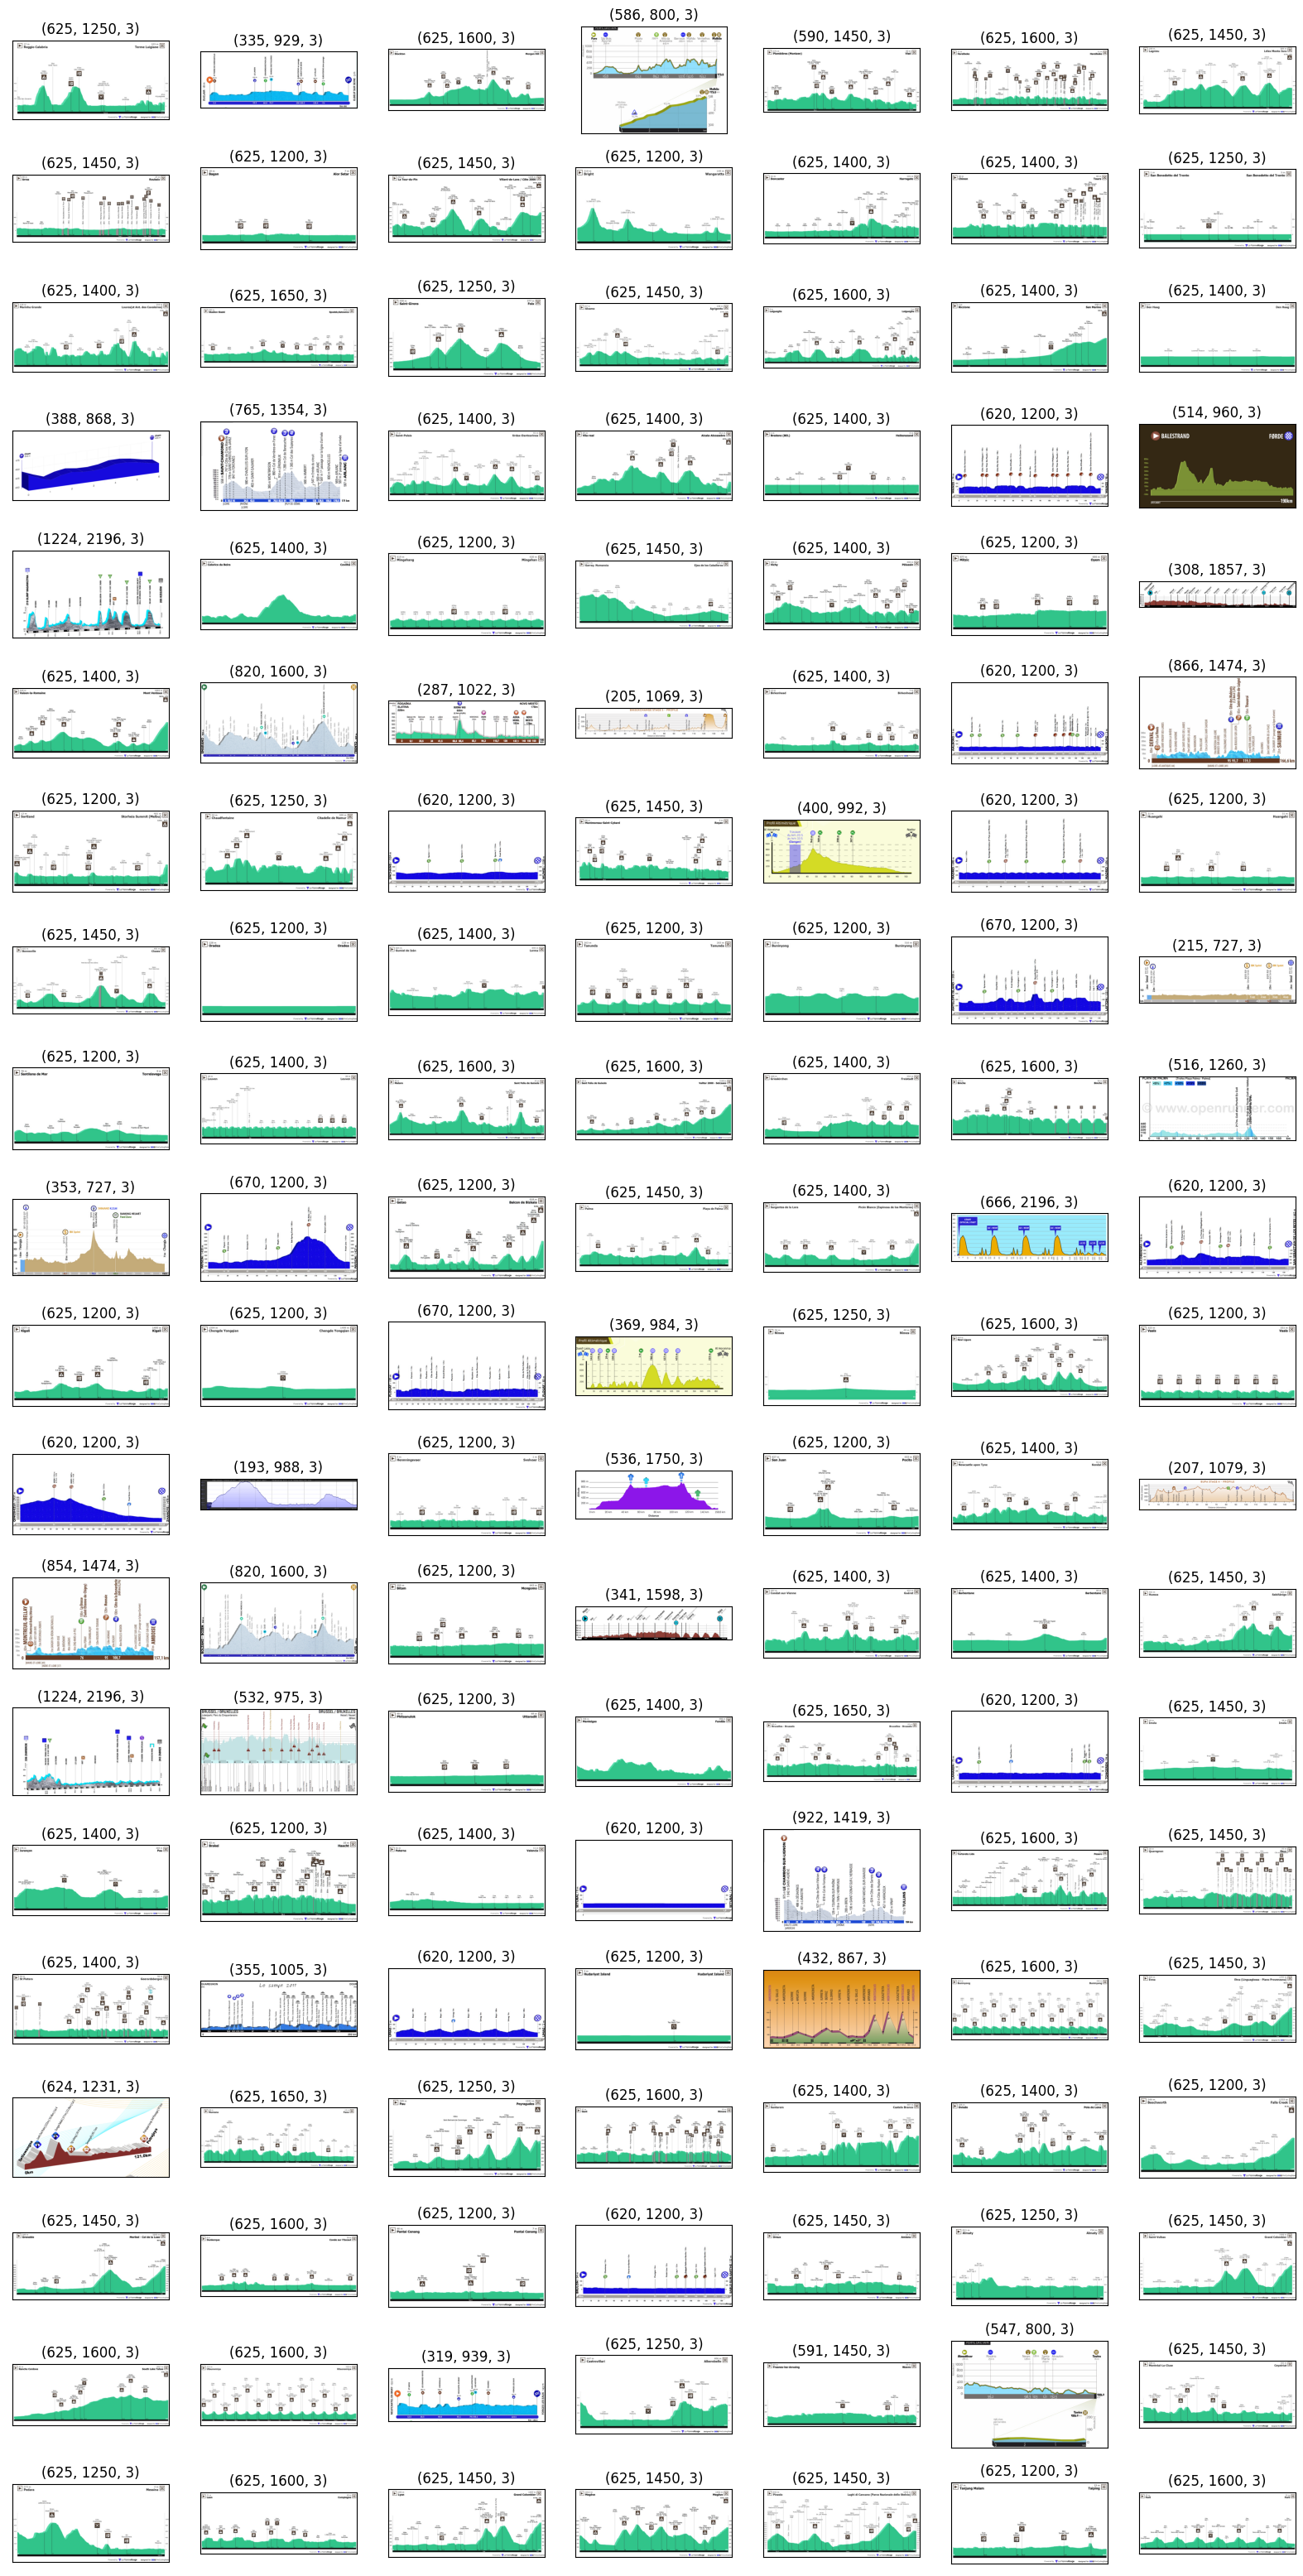

In [126]:
n_rows, n_cols = 20, 7
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 40))

for i in range(n_rows * n_cols):
    ax = axs[i // n_cols, i % n_cols]
    file_name = '../raw_data/img/'+ imgs[i]
    im = cv2.imread(file_name)
    ax.set_title(f'{im.shape}', size=12)
    ax.set_xticks(()), ax.set_yticks(())
    ax.imshow(im, cmap='gray')